In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
from segmentation_models import Linknet
from osgeo import gdal
import geoio
import utm

import matplotlib.pyplot as plt

import tif_read
import preprocess
import point_sumple
import pointsOfFild

from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import *
from keras import backend as K
from keras.models import Model
from keras.optimizers import Adam
import keras_metrics
from keras import backend

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split

%matplotlib inline 
%load_ext memory_profiler

Using TensorFlow backend.
C:\Users\Admin\Anaconda3\lib\site-packages\classification_models\resnext\__init__.py:4: UserWarning: Current ResNext models are deprecated, use keras.applications ResNeXt models
  warnings.warn('Current ResNext models are deprecated, '


## Comput parameters

In [2]:
main_path = os.getcwd()

number_paths = 3

img_size = 10980 

sample_size = 160

slice_step = 10

order_of_chanel = ['B02.tif','B03.tif','B04.tif','B05.tif'] 

number_of_chanels = len(order_of_chanel) * number_paths

sumpel = 20

num_epoch = 100

mask_path = main_path + '\\Data\\' + 'out.tif'
    
number_chanels = number_paths * len(order_of_chanel)

print("Done!")

Done!


## Data preparing

In [3]:
%memit dct_data1 = tif_read.get_dirs(main_path+"\Data"+"\TIF_S2A_MSIL1C_20180515T103021_N0206_R108_T32UNG_20180515T124152.SAFE\\")
%memit dct_data2 = tif_read.get_dirs(main_path+"\Data"+"\TIF_S2A_MSIL1C_20180508T104031_N0206_R008_T32UNG_20180508T175127.SAFE\\")
%memit dct_data3 = tif_read.get_dirs(main_path+"\Data"+"\TIF_S2B_MSIL1C_20180530T103019_N0206_R108_T32UNG_20180530T123402.SAFE\\")
%memit dct_data_mask = {main_path+"\Data"+'\out.tif':'out.tif' }
%memit lst_path = point_sumple.get_channels_path(dct_data1, order_of_chanel) + point_sumple.get_channels_path(dct_data2, order_of_chanel) + point_sumple.get_channels_path(dct_data3, order_of_chanel)

peak memory: 250.93 MiB, increment: 0.06 MiB
peak memory: 250.93 MiB, increment: 0.00 MiB
peak memory: 250.93 MiB, increment: 0.00 MiB
peak memory: 250.93 MiB, increment: 0.01 MiB
peak memory: 250.93 MiB, increment: 0.00 MiB


In [4]:
dct_data1 = tif_read.get_dct_with_names(dct_data1, order_of_chanel)
dct_data2 = tif_read.get_dct_with_names(dct_data2, order_of_chanel)
dct_data3 = tif_read.get_dct_with_names(dct_data3, order_of_chanel)
print(len(dct_data3) == 4)

True


In [ ]:
%memit dct1 = {key:tif_read.slice_data(tif_read.get_img_array(key),sample_size,sample_size, slice_step) for (key,value) in dct_data1.items()}
print("Done!")

In [ ]:
%memit dct2 = {key:tif_read.slice_data(tif_read.get_img_array(key),sample_size,sample_size, slice_step) for (key,value) in dct_data2.items()}
print("Done!")

In [ ]:
%memit dct3 = {key:tif_read.slice_data(tif_read.get_img_array(key),sample_size,sample_size, slice_step) for (key,value) in dct_data3.items()}
print("Done!")

In [ ]:
%memit dct_mask = {key:tif_read.slice_data(tif_read.get_img_mask_array(key),sample_size,sample_size, slice_step) for (key,value) in dct_data_mask.items()}
print("Done!")

In [ ]:
channels1 = preprocess.get_channels(dct1, order_of_chanel)
del dct1
channels2 = preprocess.get_channels(dct2, order_of_chanel)
del dct2
channels3 = preprocess.get_channels(dct3, order_of_chanel)
del dct3
number_sample = len(channels1[0])

print(number_sample)
print(number_sample)
print("Done!")

In [ ]:
lst_channels = channels1 + channels2 + channels3 
del channels1
del channels2
del channels3
print(len(lst_channels))
print("Done!")

In [ ]:
#%memit samples = preprocess.get_samples(lst_channels, 0, 100)

In [ ]:
masks_lst = preprocess.get_masks(dct_mask)
#%memit masks = preprocess.masks_thensor(preprocess.get_masks(dct_mask)[0:100])

In [ ]:
#X = np.array(samples)
#Y = np.array(masks)

#print("number_sample == len(X) == len(Y) == ",number_sample == len(X) == len(Y))

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
#print("Done!")

## Check data

In [ ]:
sumpel = 66
plt.imshow(X_train[sumpel][:, :, 0])
plt.show()
plt.imshow(X_train[sumpel][:, :, 1])
plt.show()
plt.imshow(X_train[sumpel][:, :, 2])
plt.show()
plt.imshow(X_train[sumpel][:, :, 3])
plt.show()
plt.imshow(X_train[sumpel][:, :, 4])
plt.show()
plt.imshow(X_train[sumpel][:, :, 5])
plt.show()
plt.imshow(X_train[sumpel][:, :, 6])
plt.show()
plt.imshow(X_train[sumpel][:, :, 7])
plt.show()
###########################################
###########################################
###########################################
plt.imshow(X_train[sumpel][:, :, 8])
plt.show()
plt.imshow(X_train[sumpel][:, :, 9])
plt.show()
plt.imshow(X_train[sumpel][:, :, 10])
plt.show()
plt.imshow(X_train[sumpel][:, :, 11])
plt.show()

In [ ]:
plt.imshow(y_train[sumpel][:, :, 0])

## Model bilding

In [5]:
model = Linknet('resnet50', classes=1, activation='sigmoid', input_shape=(sample_size, sample_size, number_chanels),encoder_weights=None)
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy',keras_metrics.precision(), keras_metrics.recall()])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 160, 160, 12) 0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 160, 160, 12) 36          data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 166, 166, 12) 0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 80, 80, 64)   37632       zero_padding2d_1[0][0]           
_____________________________________

In [ ]:
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('model_segmentation.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

batch_size = 100
number_sample = 100


def data_train_test_index(number_sample, train_test):
    lim1_train, lim2_train = 0, number_sample * train_test
    lim1_test, lim2_test =lim2_train + 1,  number_sample * (1 - train_test)
    return lim1_train, lim2_train, lim1_test, lim2_test

lim1_train, lim2_train, lim1_test, lim2_test = data_train_test_index(number_sample, 0.8)

In [ ]:
train_generator = preprocess.generator(lst_channels, masks_lst, batch_size, lim1_train, lim2_train)
validation_generator = preprocess.generator(lst_channels, masks_lst, batch_size, lim1_test, lim2_test)
results = model.fit_generator(train_generator, validation_data=validation_generator,validation_steps=20, samples_per_epoch=80, nb_epoch=10,verbose=1)

In [ ]:
def get_loss_error_plt(results):
    plt.figure(figsize=(8, 8))
    plt.title("Learning curve")
    plt.plot(results.history["loss"], label="loss")
    plt.plot(results.history["val_loss"], label="val_loss")
    plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
    plt.xlabel("Epochs")
    plt.ylabel("log_loss")
    plt.legend();
get_loss_error_plt(results) 

In [ ]:
preds_train = model.predict(X_train, verbose=1)
preds_test = model.predict(X_test, verbose=1)

In [ ]:
for sumpel in range(len(X_train)):
    print("#######################################")
    plt.imshow(preds_train[sumpel][:, :, 0])
    plt.show()
    plt.imshow(y_train[sumpel][:, :, 0])
    plt.show()
    print("#######################################")
preds_train[sumpel][:, :, 0]

In [ ]:
arry = preds_train[sumpel][:, :, 0]
plt.imshow(arry)

In [ ]:
for sumpel in range(len(X_test)):    
    print("#######################################")
    plt.imshow(preds_test[sumpel][:, :, 0])
    plt.show()
    plt.imshow(y_test[sumpel][:, :, 0])
    plt.show()
    print("#######################################")

## Load model

In [6]:
model = Linknet('resnet50', classes=1, activation='sigmoid', input_shape=(sample_size, sample_size, number_chanels),encoder_weights=None)
Path_to_weights = 'Model\\model_segmentation.h5'
model.load_weights(Path_to_weights)

In [7]:
def get_prediction(model, sumple):
    return model.predict(sumple, verbose=1)

def get_origin_mask(imgMatrixRead, mask_path, point, sample_size):
    return point_sumple.get_sumple_of_point([mask_path], point, imgMatrixRead, sample_size)

def get_mask(pred, threshold):
    pred[pred < threshold] = 0.0
    pred[pred > 0.0] = 1.0
    return pred

path = lst_path[0]
imgMatrixRead  = point_sumple.ImgMatrixRead(lst_path, mask_path)
imgcord = point_sumple.Imgcord(imgMatrixRead) # point_lat_lon = (55.514385, 9.818952)
#print(imgcord.latlon_to_pix(55.493677, 9.890756))

In [8]:
#sumple = point_sumple.get_sumple_of_point(lst_path,(5173, 4770),imgMatrixRead, sample_size)
#mask = get_origin_mask(imgMatrixRead, mask_path, (5173, 4770), sample_size)
#pred = get_prediction(model, np.array([sumple]))
##print(type(pred[0][0][0][0])) # 'numpy.float32'
#pred1 = get_mask(pred, 0.1)

In [9]:
#plt.imshow(sumple[:,:,0])
#plt.show()
#plt.imshow(sumple[:,:,1])
#plt.show()
#plt.imshow(sumple[:,:,2])
#plt.show()
#plt.imshow(sumple[:,:,3])
#plt.show()
#plt.imshow(sumple[:,:,4])
#plt.show()
#plt.imshow(sumple[:,:,5])
#plt.show()
#plt.imshow(sumple[:,:,6])
#plt.show()
#plt.imshow(sumple[:,:,7])
#plt.show()
#plt.imshow(sumple[:,:,8])
#plt.show()
#plt.imshow(sumple[:,:,9])
#plt.show()
#plt.imshow(sumple[:,:,10])
#plt.show()
#plt.imshow(sumple[:,:,11])
#plt.show()
#print("#############################")
#plt.imshow(np.array([mask])[0][:,:,0])
#plt.show()
#plt.imshow(pred1[0][:,:,0])
#plt.show()
#plt.imshow(pred[0][:,:,0])
#plt.show()

In [10]:
#import cv2
#kernel = np.ones((1,1),np.uint8)
#erosion = cv2.erode(pred[0],kernel,iterations = 1)
#closing = cv2.morphologyEx(erosion, cv2.MORPH_CLOSE, kernel)

In [11]:
#plt.imshow(erosion)
#plt.show()

In [12]:
#plt.imshow(np.array([mask])[0][:,:,0])
#plt.show()

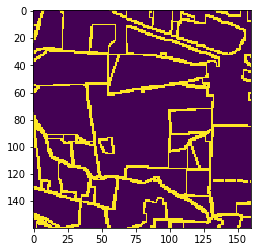

In [13]:
point_lat_lon = (55.457873, 9.908699)
point_glob_pix = pointsOfFild.get_glob_cord_pix(imgcord, point_lat_lon)
pred, imgcord = pointsOfFild.new_mask(point_glob_pix, imgMatrixRead, imgcord, model, sample_size, True)
plt.imshow(pred[:,:,0])
plt.show()
lst_lat_lon = recursion.get_points_of_fild(point_lat_lon, imgMatrixRead, imgcord, model, sample_size, True)
#print(lst_lat_lon)   

In [22]:
import break_line
point_glob_pix = pointsOfFild.get_glob_cord_pix(imgcord, point_lat_lon)
lst_lat_lon = pointsOfFild.get_points_of_fild(point_lat_lon, imgMatrixRead, imgcord, model, sample_size, True)
lst_pix = pointsOfFild.get_pix_local(lst_lat_lon, imgcord, sample_size)

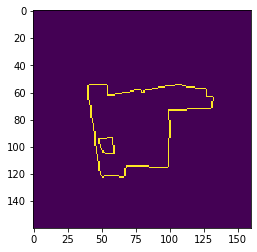

In [25]:
def demonstrate(mask, lst):
    mask = mask[:,:,0]
    for i in lst:
        mask[i[0]][i[1]] = 1.0
    plt.imshow(mask)
    plt.show()    


(5392, 5748)


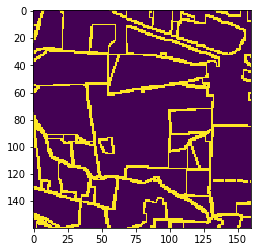

In [21]:
#point_lat_lon = (55.476321, 9.837827)
#lst_lat_lon = recursion.get_points_of_fild(point_lat_lon, imgMatrixRead, imgcord, model, sample_size, True)
point_glob_pix = pointsOfFild.get_glob_cord_pix(imgcord, point_lat_lon)
print(point_glob_pix)
#lst_pix = pointsOfFild.get_pix_local(lst_lat_lon, imgcord, sample_size)
#pred, imgcord = pointsOfFild.new_mask(point_glob_pix, imgMatrixRead, imgcord, model, sample_size, True)  
demonstrate(pred, lst_pix)

In [ ]:
pd.DataFrame(data={'xcord':list(map(lambda x:x[0],lst_lat_lon)),
                   'ycord':list(map(lambda x:x[1],lst_lat_lon))}).to_csv("sample1.csv")

In [ ]:
##########################################
import cv2, numpy as np
def kernel_connecting_broken(bw, size): 
    kernel = np.ones(size, np.uint8)  # note this is a horizontal kernel
    d_im = cv2.dilate(bw, kernel, iterations=1)
    e_im = cv2.erode(d_im, kernel, iterations=1) 
    return e_im
mask = kernel_connecting_broken(pred[:,:,0], (4,1)) # (1,4)


In [ ]:
plt.imshow(mask)
plt.show()